<a href="https://colab.research.google.com/github/asosam91/SisDist2/blob/master/ClassNotesW2%20Huellas%20de%20memoria%20y%20generadores%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>> # Resumen Semana 1



In [0]:
import psutil, os 
import numpy as np
import pandas as pd

In [0]:
def huella_de_memoria():
  '''Regresa al memoria usada por un proceso en python'''
  mem = psutil.Process(os.getpid()).memory_info().rss
  return (mem/1024**2)

>>> # Semana 2
- descarga de datos 


In [0]:
plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/' + plantilla

In [0]:
comandos = [plantillaURL.format(y) for y in range(1,4)] # for corto

In [0]:
# (plantillaURL.format(y) for y in range(1,13)) # hasta que se usa se ejecuta la funcion y esta mas vergas xD ahorra memoria

In [0]:
# descarga de datos 
for cmd in comandos:
  os.system(cmd)
  

In [0]:
archivo = 'yellow_tripdata_2018-01.csv'

In [0]:
data = pd.read_csv(archivo)

In [9]:
sum(data.memory_usage(index=False)/(1024**2))

1122

In [25]:
for part in pd.read_csv(archivo, chunksize=50000):
  print('type: %s shape %s'%(type(part), part.shape))

typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <class 'pandas.core.frame.DataFrame'> shape (50000, 17)
typ3: <c

In [29]:
part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9874 entries, 8750000 to 8759873
Data columns (total 17 columns):
VendorID                 9874 non-null int64
tpep_pickup_datetime     9874 non-null object
tpep_dropoff_datetime    9874 non-null object
passenger_count          9874 non-null int64
trip_distance            9874 non-null float64
RatecodeID               9874 non-null int64
store_and_fwd_flag       9874 non-null object
PULocationID             9874 non-null int64
DOLocationID             9874 non-null int64
payment_type             9874 non-null int64
fare_amount              9874 non-null float64
extra                    9874 non-null float64
mta_tax                  9874 non-null float64
tip_amount               9874 non-null float64
tolls_amount             9874 non-null float64
improvement_surcharge    9874 non-null float64
total_amount             9874 non-null float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.3+ MB


In [30]:
part.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8750000,2,2018-01-31 23:36:22,2018-01-31 23:46:11,1,1.8,1,N,162,186,1,8.5,0.5,0.5,1.96,0.0,0.3,11.76
8750001,1,2018-01-31 23:41:34,2018-01-31 23:45:40,2,1.0,1,N,234,79,1,5.5,0.5,0.5,2.00,0.0,0.3,8.80
8750002,1,2018-01-31 23:26:35,2018-01-31 23:29:48,2,0.6,1,N,234,170,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
8750003,1,2018-01-31 23:15:56,2018-01-31 23:16:09,1,9.6,1,N,77,77,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80
8750004,1,2018-01-31 23:17:26,2018-01-31 23:17:42,1,9.6,1,N,77,77,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80


definir una condicion de es un viaje largo mayor a 10 mi?
' longTRip = trip_distance>10 ' 

In [0]:
LongTrip = (part.trip_distance > 10)

In [33]:
LongTrip.head()

8750000    False
8750001    False
8750002    False
8750003    False
8750004    False
Name: trip_distance, dtype: bool

In [35]:
part.loc[LongTrip].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8750014,1,2018-01-31 23:54:31,2018-02-01 00:19:36,1,14.50,5,N,138,265,1,92.0,0.0,0.0,15.00,5.76,0.3,113.06
8750032,2,2018-01-31 23:12:39,2018-01-31 23:31:49,1,11.44,1,N,138,77,2,31.5,0.5,0.5,0.00,0.00,0.3,32.80
8750067,2,2018-01-31 23:35:03,2018-01-31 23:56:11,5,10.23,1,N,138,163,1,30.0,0.5,0.5,5.00,5.76,0.3,42.06
8750088,1,2018-01-31 23:00:12,2018-01-31 23:38:46,1,16.00,1,N,132,256,1,48.5,0.5,0.5,5.00,0.00,0.3,54.80
8750115,1,2018-01-31 23:32:12,2018-02-01 00:09:26,1,19.00,1,N,234,210,1,53.5,0.5,0.5,10.95,0.00,0.3,65.75


encapsular la operacion de filtrado en una funcion


In [0]:
def tripFilter(data):
  LongTrip = (data.trip_distance > 10)
  return data.loc[LongTrip]

In [0]:
trozos = []
for trozo in pd.read_csv(archivo, chunksize = 500000):
  trozos.append(tripFilter(trozo))

In [39]:
len(trozos)

18

es conveniente usar una *list comprehencion* para generar la lista anterios

In [41]:
trozos = [tripFilter(trozo) for trozo in pd.read_csv(archivo, chunksize=500000)]
len(trozos)

18

In [0]:
tamano = [len(trozo) for trozo in trozos]

In [43]:
tamano

[36840,
 24360,
 27249,
 32064,
 26497,
 27405,
 23502,
 30812,
 25838,
 24353,
 22569,
 30044,
 24992,
 24950,
 22277,
 27423,
 23822,
 11817]

In [47]:
sum(tamano)

466814

In [48]:
LongTripsDF = pd.concat(trozos)
LongTripsDF.shape

(466814, 17)

In [0]:
import matplotlib.pyplot as plt

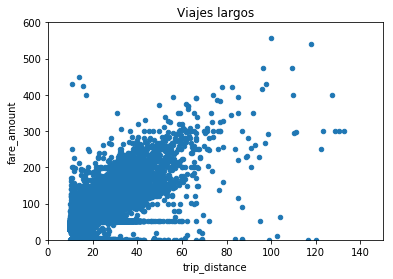

In [54]:
LongTripsDF.plot.scatter(x ='trip_distance', y='fare_amount', title='Viajes largos', xlim=(0,150), ylim=(0,600))

hacer un uotlayer para encontrar errores 

##Generadores

In [56]:
trozos = (tripFilter(trozo) for trozo in pd.read_csv(archivo, chunksize=500000))
trozos

<generator object <genexpr> at 0x7faec11b4938>

In [57]:
antes = huella_de_memoria()
trozos = (tripFilter(trozo) for trozo in pd.read_csv(archivo, chunksize=500000))
despues = huella_de_memoria()
print(despues-antes)

0.0


In [0]:
distancias = (trozo['trip_distance'].sum()for trozo in trozos)

In [59]:
sum(distancias)

7339629.629999999

ller muchos archivos

In [0]:
df = pd.read_csv('yellow_tripdata_2018-01.csv', parse_dates=[1,2])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: datetime64[ns](2), float64(8), int64(6), object(1)
memory usage: 1.1+ GB


In [63]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [0]:
def cuentaViajesTardado(df):
  df['duracion'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds
  viajeTardado= df.duracion > 1200
  resultDicc = {'n_long': [sum(viajeTardado)],
               'n_tota': [len(df)]}
  return pd.DataFrame(resultDicc)

In [0]:
archivos = [plantilla.format(y) for y in range(1,4)]

In [0]:
dataFrames = (pd.read_csv(archivo, parse_dates=[1,2])for archivo in archivos)

In [0]:
totales =(cuentaViajesTardado(df) for df in dataFrames)

In [0]:
totalesTrimestrales = sum(totales)

In [76]:
totalesTrimestrales

,n_long,n_tota
0,4942465,26682326


In [78]:
totalesTrimestrales['n_long']/totalesTrimestrales['n_tota']

0    0.185234
dtype: float64

tarea huella d ememoria y tiempo
3 meses
6 meses
9 meses 
12 meses